In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [3]:
from numpy.random import seed
seed(1)

from tensorflow import random
random.set_seed(2)

In [4]:
# load csv into dataframe
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,AMD_open,AMD_high,AMD_low,AMD_close,TSLA_open,TSLA_high,...,JNJ_low,JNJ_close,REGN_open,REGN_high,REGN_low,REGN_close,GILD_open,GILD_high,GILD_low,GILD_close
2010-06-29,24.13,24.20,23.110,23.31,7.93,7.93,7.41,7.48,19.00,25.0000,...,58.680,59.24,23.67,23.95,22.86,22.98,35.40,35.61,34.740,34.97
2010-06-30,23.30,23.68,22.950,23.01,7.58,7.65,7.30,7.32,25.79,30.4192,...,58.940,59.06,23.05,23.47,22.32,22.32,34.83,35.13,34.260,34.28
2010-07-01,23.09,23.32,22.730,23.16,7.35,7.53,7.10,7.39,25.00,25.9200,...,58.650,59.07,22.31,22.37,20.45,20.79,34.24,34.27,33.300,34.14
2010-07-02,23.36,23.48,23.050,23.27,7.45,7.48,7.02,7.17,23.00,23.1000,...,58.850,59.08,21.06,21.88,20.75,21.61,34.38,35.16,34.180,34.87
2010-07-06,23.70,24.09,23.584,23.82,7.40,7.42,6.96,7.04,20.00,20.0000,...,58.669,59.08,22.03,22.03,21.16,21.36,35.11,35.42,34.415,34.77


In [5]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AMD_open',
    'AMD_high',
    'AMD_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

,MSFT_close,AMD_close,TSLA_close,JNJ_close,REGN_close,GILD_close
2010-06-29,23.31,7.48,23.89,59.24,22.98,34.97
2010-06-30,23.01,7.32,23.83,59.06,22.32,34.28
2010-07-01,23.16,7.39,21.96,59.07,20.79,34.14
2010-07-02,23.27,7.17,19.20,59.08,21.61,34.87
2010-07-06,23.82,7.04,16.11,59.08,21.36,34.77


In [6]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

window size: 1
stock: MSFT_close
MSE:1931.4131780222315
RMSE:43.9478461135723
window size: 5
stock: MSFT_close
MSE:35.89168357563136
RMSE:5.990966831458121
window size: 10
stock: MSFT_close
MSE:138.18034173564257
RMSE:11.755013472371802
window size: 15
stock: MSFT_close
MSE:112.81178083501818
RMSE:10.621289038295595
window size: 20
stock: MSFT_close
MSE:96.37678283577576
RMSE:9.817167760396874
window size: 25
stock: MSFT_close
MSE:49.44582776776468
RMSE:7.031772732943286
window size: 30
stock: MSFT_close
MSE:12.925068774465895
RMSE:3.5951451673702826
window size: 1
stock: AMD_close
MSE:119.60327807052647
RMSE:10.936328363327725
window size: 5
stock: AMD_close
MSE:10.61563196300167
RMSE:3.2581638944352798
window size: 10
stock: AMD_close
MSE:19.011919668247494
RMSE:4.360266008886097
window size: 15
stock: AMD_close
MSE:18.106817978675945
RMSE:4.255210685580203
window size: 20
stock: AMD_close
MSE:26.718297326684365
RMSE:5.168974494683096
window size: 25
stock: AMD_close
MSE:23.040337879

/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
MSE:164.36869227049675
RMSE:12.820635408219701


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
MSE:12.417694467498453
RMSE:3.5238749222267316


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
MSE:9.572480136368936
RMSE:3.0939424907985824


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
MSE:7.863079951530803
RMSE:2.804118391140218


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
MSE:10.601683090767466
RMSE:3.2560225875702193


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
MSE:6.002647948584733
RMSE:2.4500301934026716


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
MSE:6.2497829141040695
RMSE:2.4999565824437973


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
MSE:1349.4678721778796
RMSE:36.735104085572964


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
MSE:388.97008197932524
RMSE:19.72232445680086


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
MSE:390.0064619898225
RMSE:19.748581265240865


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
MSE:385.48673870704937
RMSE:19.633816203353064


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
MSE:304.88011851519366
RMSE:17.4608166623212


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
MSE:194.92617459226983
RMSE:13.961596419903772


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
MSE:192.24607754450793
RMSE:13.865283175777837


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
MSE:4.429105775503802
RMSE:2.1045440778239364


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
MSE:4.9268570008819585
RMSE:2.21965245047101


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
MSE:6.748616715252242
RMSE:2.5978099844392473


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
MSE:6.481417010735811
RMSE:2.5458627242519993


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
MSE:4.916118647353056
RMSE:2.2172322042025856


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
MSE:4.722146342581382
RMSE:2.1730500092223792


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
MSE:5.130809794983897
RMSE:2.265129090136784


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


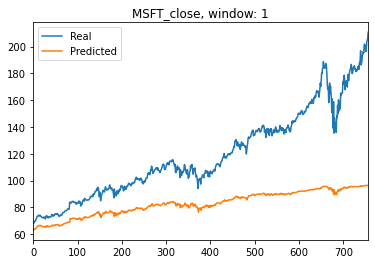

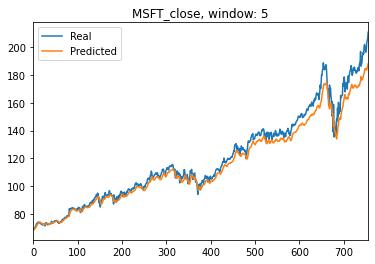

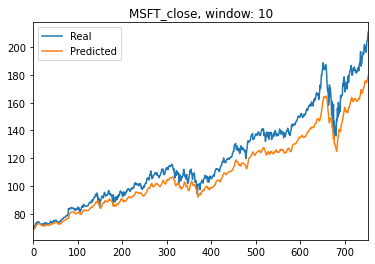

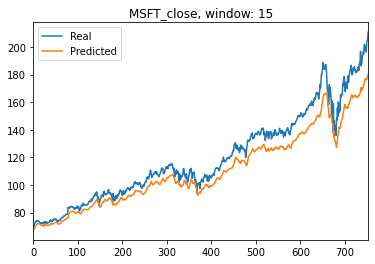

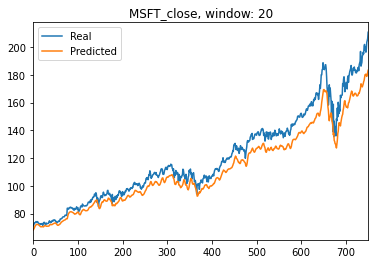

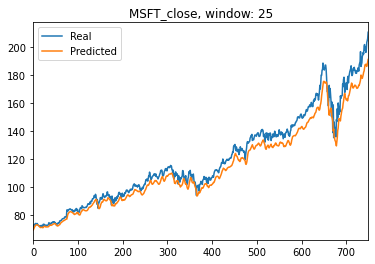

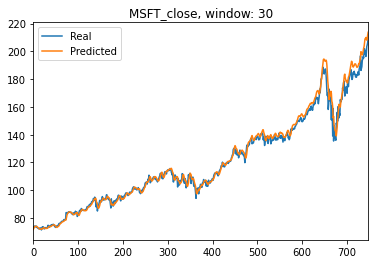

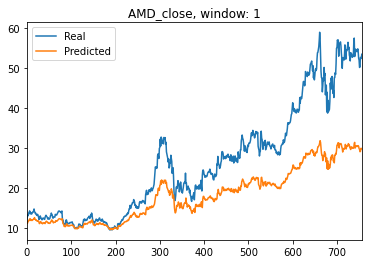

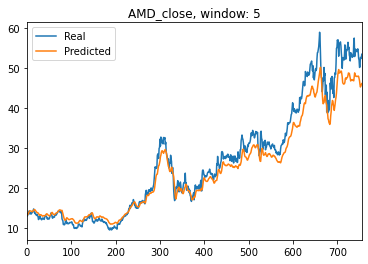

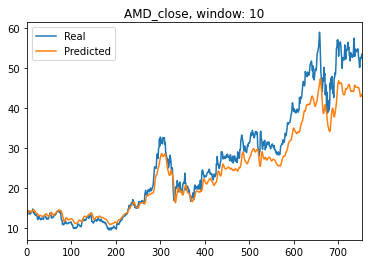

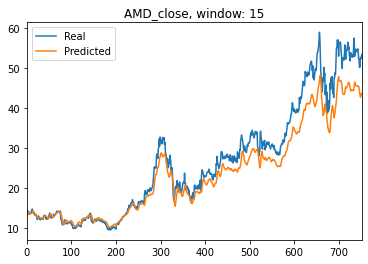

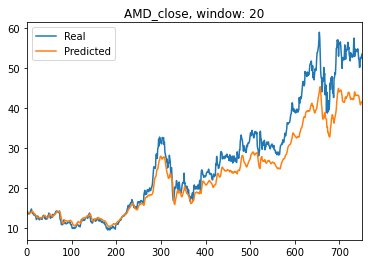

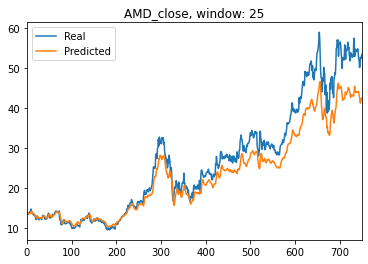

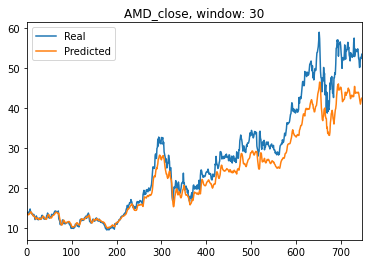

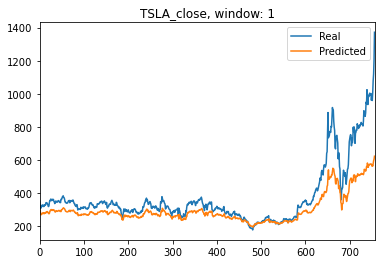

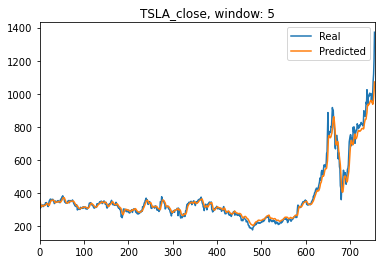

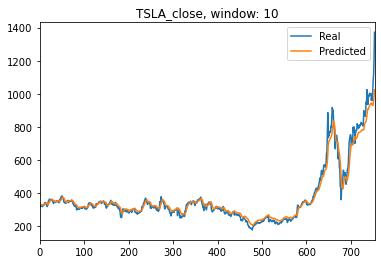

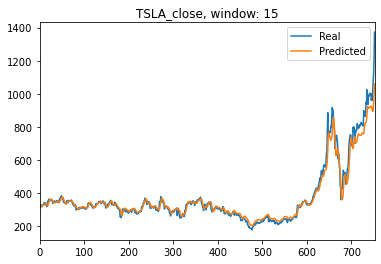

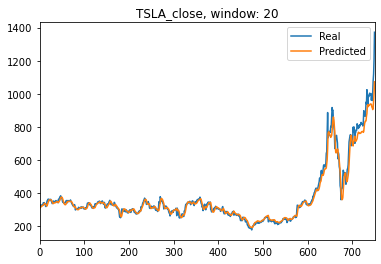

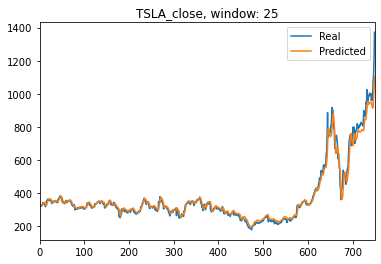

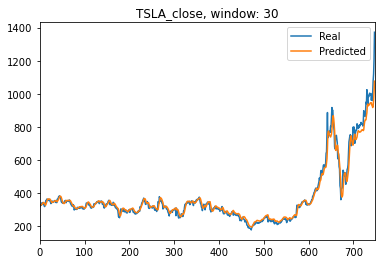

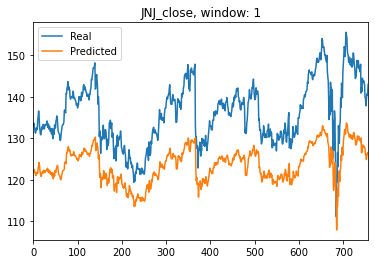

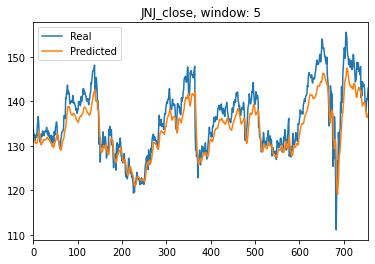

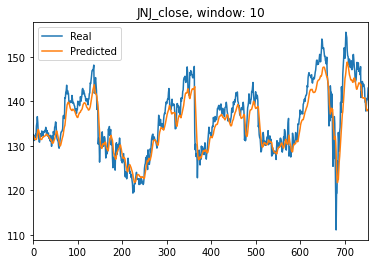

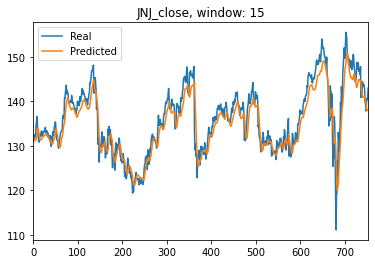

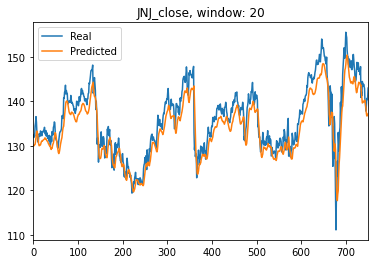

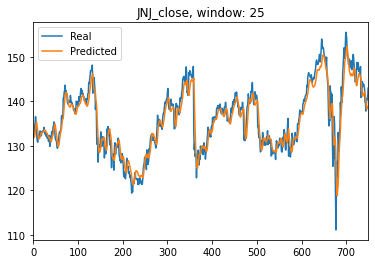

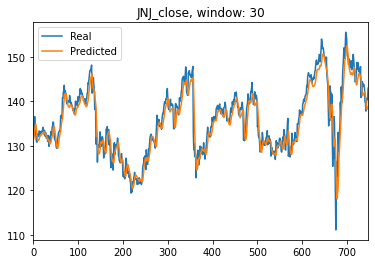

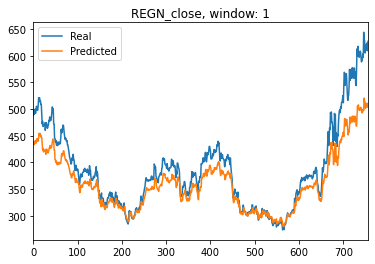

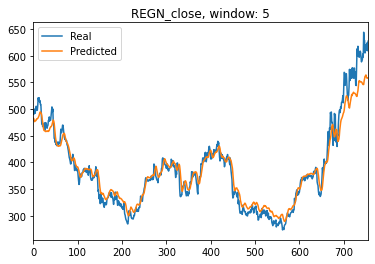

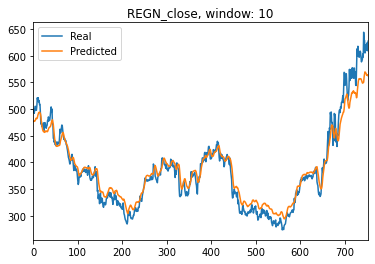

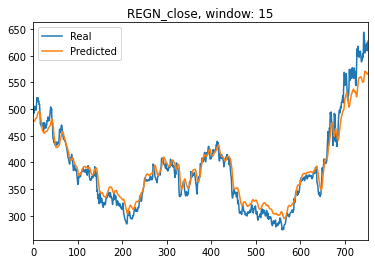

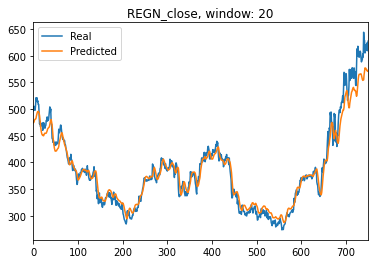

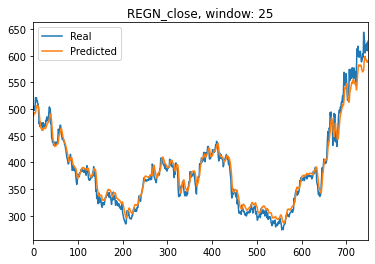

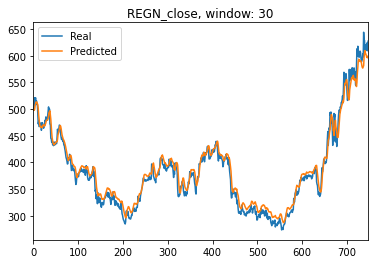

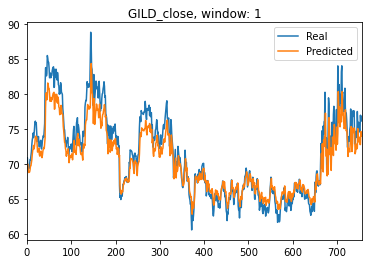

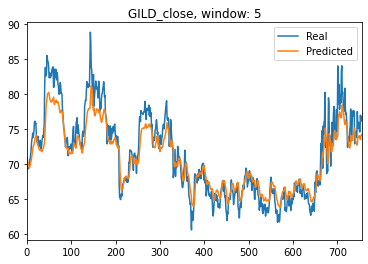

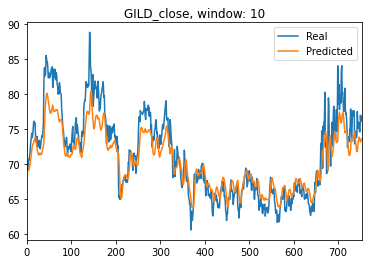

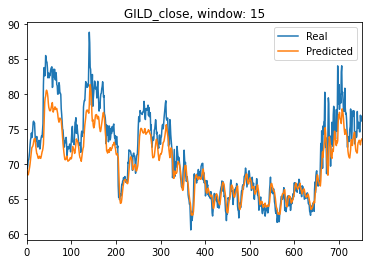

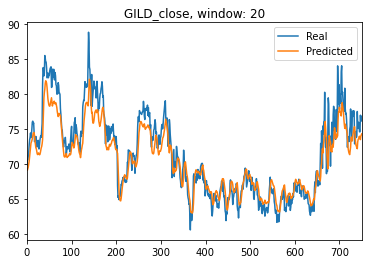

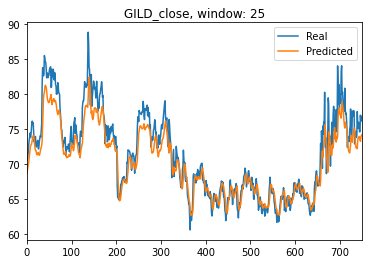

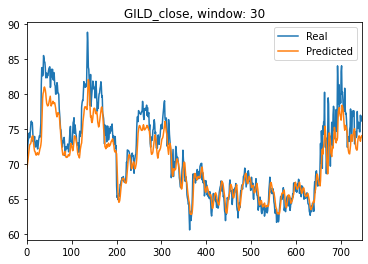

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# import hvplot.pandas
# import matplotlib.pyplot as plt
import time

window_sizes = [1,5,10,15,20,25,30]
stock_list = [0,1,2,3,4,5]

for stock in stock_list:
    for window_size in window_sizes:

        feature_column = stock # iterate over this to predict each stock in dataframe
        target_column = stock # iterate over this to predict each stock in dataframe
        X, y = window_data(df, window_size, feature_column, target_column)

        # Use 70% of the data for training and the remainder for testing
        split = int(0.7 * len(X))
        X_train = X[: split - 1]
        X_test = X[split:]
        y_train = y[: split - 1]
        y_test = y[split:]

        # Use the MinMaxScaler to scale data between 0 and 1.
        scaler = MinMaxScaler()
        scaler.fit(X)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        scaler.fit(y)
        y_train = scaler.transform(y_train)
        y_test = scaler.transform(y_test)

        # Reshape the features for the model
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Define the LSTM RNN model.
        model = Sequential()

        number_units = window_size # should be equal to the size of the time window as selected above
        dropout_fraction = 0.25 # means that each epoch will randomly drop x% - iterate over

        # Layer 1
        model.add(LSTM(
            units=number_units,
        #     return_sequences=True,
            input_shape=(X_train.shape[1], 1))
            )
        model.add(Dropout(dropout_fraction))
        # Layer 2
        # model.add(LSTM(units=number_units, return_sequences=True))
        # model.add(Dropout(dropout_fraction))
        # Layer 3
        # model.add(LSTM(units=number_units))
        # model.add(Dropout(dropout_fraction))
        # Output layer
        model.add(Dense(1))

        # Compile the model
        model.compile(optimizer="adam", loss="mean_squared_error")

        # Train the model
        model.fit(X_train, y_train, epochs=30, shuffle=False, batch_size=10, verbose=0)

        # Evaluate the model
        model.evaluate(X_test, y_test, verbose=0)

        # Make some predictions
        predicted = model.predict(X_test)

        # Recover the original prices instead of the scaled version
        predicted_prices = scaler.inverse_transform(predicted)
        real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Create a DataFrame of Real and Predicted values
        stocks = pd.DataFrame({
            "Real": real_prices.ravel(),
            "Predicted": predicted_prices.ravel()
        })

        # Plot the real vs predicted prices as a line chart
        print(f'window size: {window_size}\nstock: {df.columns[stock]}')
        stocks.plot(title=f'{df.columns[stock]}, window: {window_size}')

        print(f'MSE:{mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=True)}')
        print(f'RMSE:{mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=False)}')